# CS 109A/AC 209A/STAT 121A Data Science: Homework 2
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, September 21st, 2016 at 11:59pm

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW2.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**


Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [1]:
import numpy as np
import pandas as pd
import random
import sklearn as sk
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.cross_validation import train_test_split as sk_split
from sklearn.linear_model import LinearRegression as Lin_Reg
import time
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

---

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

[Ravi, Nikhila]

### Part (b): Course Number

AC 209a

### Part (c): Who did you work with?

Collaborators:

Alice Sommmer, 
Niloy Biswas

---

## Problem 1: Inside the Models in Scikit-learn

In this problem, we will be implementing K-Nearest Neighbour and simple linear regression for predicting a quantitative variable. We will compare the performance of our implementation with those of Scikit-learn (``sklearn``).

The datasets required for this problem is in the ``dataset`` directory. Each file in the ``dataset`` directory contains a one-dimensional data set, with the first column containing the independent variable X, and the second column containing the dependent variable Y. 

### Part (a): Implement the models by hand
In this part you **may not** use ``sklearn`` for any task.

In the following, you may use ``numpy`` arrays instead of ``pandas`` dataframes.

- Implement a funtion ``split``, which satifies:
    - input: an ``nx2`` dataframe ``data``, a float ``m``
    - return: an ``nx2`` dataframe ``train`` and an ``nx2`` dataframe ``test``, consisting of ``m`` percent and ``100 - m`` percent of the data, respectively.


- Implement K-Nearest Neighbour for predicting a quantitative variable. That is, write a function, ``knn_predict``, that satisfies:
    - input: an integer ``k``, an ``n x 2`` dataframe training set ``train``, an ``n x 1`` dataframe testing set ``test``
    - return: an ``nx2`` dataframe, whose first column is that of ``test`` and whose second column is the predicted values.



- Implement linear regression for predicting a quantitative variable. That is, write a function ``linear_reg_fit`` that satisfies:
    - input: an ``nx2`` dataframe training set ``train``
    - return: the coefficients of the linear regression model - a float ``slope`` and a float ``intercept``.
    
    
- Write a function ``linear_reg_predict`` that satisfies:
    - input: an ``nx1`` dataframe testing set ``test``, as well as the coefficients of the linear regression model
    - return: an ``nx2`` dataframe, whose first column is that of ``test`` and whose second column is the predicted values.
    
    
- Implement a function ``score`` that satisfies:
    - input: an ``nx2`` dataframe ``predicted``, an ``nx2`` dataframe ``actual`` 
    - return: R^2 coefficient of the fit of the predicted values.

**Solution:**

In [151]:
def split(data, m):
    train=data.sample(frac=m)
    test=data.drop(train.index)
    return train, test

def knn_predict(train_df, test_df, k):
    train = np.asarray(train_df['x'], train_df['y'])
    test = np.asarray(test_df['x'])
    # use the absolute difference in x position as the similarity measure
    euclidean_distance_matrix = []
    for i in range(len(test)):
        train_copy = train_df.copy()
        train_copy['dist']  = train_copy.apply(lambda row: abs(row['x'] - test[i]), axis=1)
        euclidean_distance_matrix.append(train_copy)
    # sort the distances in ascending order
    [distance_frame.sort_values(by="dist", inplace=True) for distance_frame in euclidean_distance_matrix]
    # extract the indices of the k nearest data points
    predicted_y = [distance_frame['y'].head(k).mean() for distance_frame in euclidean_distance_matrix]
    # create a new df with the x values and predicted y values 
    predicted_values = pd.DataFrame(data={"x": test_df['x'], 'y': predicted_y})
    return predicted_values

def lin_reg_fit(train):
    X, Y = [train['x'], train['y']]
    # uses the formula for beta1
    m =  np.sum((X-np.mean(X)) * (Y-np.mean(Y)))/np.sum( (X-np.mean(X))**2)
    # uses the formula for beta0
    b = np.mean(Y) - m*np.mean(X) 
    return m, b

def lin_reg_predict(test, m, b):
    predicted = pd.DataFrame(data={"x": test['x'], "y": m*test['x'] + b})
    return predicted

def score(Y, Y_h):
    RSS = np.sum((Y-Y_h)**2)
    TSS = np.sum((Y-np.mean(Y))**2)
    R2 = 1 - RSS/TSS
    return R2

### Part (b): Compare with ``sklearn``

- Load the contents of ``dataset_1_full.txt`` into a ``pandas`` dataframe, or ``numpy`` array. 


- Use your functions from Part (a) to split the data into training and testing sets (70-30). Evaluate how KNN and linear regression each perform on this dataset.


- Use ``sklearn`` to split the data into training and testing sets (70-30). Use ``sklearn`` to evaluate how KNN and linear regression each perform on this dataset.


- Use Python's ``time`` library to measure how well your implementations compare with that of ``sklearn``. What can you do (algorithmically or codewise) to make your implementation faster or more efficient?

**Solution:**

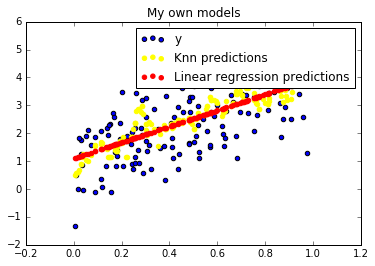

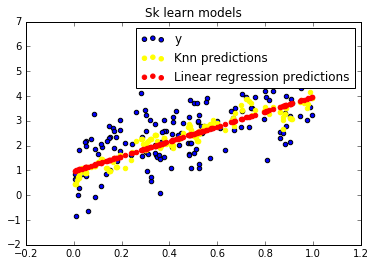

            Knn  sk_learn_knn
Score  0.381984      0.413618
Time   1.329746      0.001683
            Lin  sk_learn_lin
Score  0.448383      0.430499
Time   0.000878      0.000753


In [153]:
import time

def sk_learn_knn(Xtrain, Ytrain, Xtest, Ytest, k):
    #fit knn model
    neighbours = KNN(n_neighbors=k)
    neighbours.fit(Xtrain, Ytrain)
    
    #predict y-values for values in the testing set 
    predicted_y = neighbours.predict(Xtest)
    
    #score predictions
    r = neighbours.score(Xtest, Ytest)
    return r, predicted_y
    
def sk_learn_lin_reg(Xtrain, Ytrain, Xtest, Ytest):
    #fit linear model
    regression = Lin_Reg()
    regression.fit(Xtrain, Ytrain)
    
    #predict y-values for values in the testing set 
    predicted_y = regression.predict(Xtest)
    
    #score predictions
    r = regression.score(Xtest, Ytest)
    return r, predicted_y

data = pd.read_csv('./dataset/dataset_1_full.txt')

##############################
# my own models and analysis
##############################

train, test = split(data, 0.7)

knn_start = time.time()
knn_predictions = knn_predict(train, test, 10)
knn_end = time.time()

lin_start = time.time()
m, b = lin_reg_fit(train)
lin_end = time.time()

lin_predictions = lin_reg_predict(test, m, b)

knn_score = score(test['y'], knn_predictions['y'])
lin_score = score(test['y'], lin_predictions['y'])

#########################################
# plot the model
########################################

plt.scatter(test['x'],test['y'])
plt.scatter(test['x'], knn_predictions['y'], color='yellow', label='Knn predictions')
plt.scatter(test['x'], lin_predictions['y'], color='red', label='Linear regression predictions')
plt.title('My own models')
plt.legend()

##############################
# sk learn models and analysis 
##############################

data = pd.read_csv('./dataset/dataset_1_full.txt')
Xtrain, Xtest, Ytrain, Ytest = sk_split(data['x'], data['y'], train_size=0.7, random_state=42)
Xtrain = Xtrain.reshape(len(Xtrain), 1)
Xtest = Xtest.reshape(len(Xtest), 1)

sk_learn_knn_start = time.time()
knn_r, predicted_y_knn = sk_learn_knn(Xtrain, Ytrain, Xtest, Ytest, 10)
sk_learn_knn_end = time.time()

sk_learn_lin_start = time.time()
lin_r, predicted_y_lin = sk_learn_lin_reg(Xtrain, Ytrain, Xtest, Ytest)
sk_learn_lin_end = time.time()

#########################################
# plot the model
########################################

plt.figure()
plt.scatter(Xtest,Ytest)
plt.scatter(Xtest, predicted_y_knn, color='yellow', label='Knn predictions')
plt.scatter(Xtest, predicted_y_lin, color='red', label='Linear regression predictions')
plt.title('Sk learn models')
plt.legend()
plt.show()

##############################
# format the results 
##############################

knn_results = pd.DataFrame(columns=['Knn', 'sk_learn_knn'])
knn_results.loc['Score'] = [knn_score, knn_r]
knn_results.loc['Time'] = [knn_end - knn_start, sk_learn_knn_end - sk_learn_knn_start]
print knn_results.head()

lin_results = pd.DataFrame(columns=['Lin', 'sk_learn_lin'])
lin_results.loc['Score'] = [lin_score, lin_r]
lin_results.loc['Time'] = [lin_end - lin_start, sk_learn_lin_end - sk_learn_lin_start]
print lin_results.head()


The R^2 score can be used as a measure of the closeness of fit of the model to the data and the ability of the model to predict the value of y for a test data point. The KNN model has a slightly lower R^2 value compared to the Linear Regression model. The visualisation shows that there is a linear increasing trend in the data which can be captured by the linear model, and this model ignores the scatter in the y value which could be attributed to noise. 

Using Sklearn, the Knn values for linear regression are also higher than for KNN. The linear regression model from sk_learn has a similar R^2 score compared to the approximate model implemented in part (a) and also has a similar evaluation time. The Sklearn KNN model has a higher R^2 value compared to the KNN model implemented in part (a), but has a much faster evaluation time as Sk learn probably uses optimised algorithmns. 

I could rewrite my functions to use matrix/vector manipulations to increase the speed of operation as numpy is optimised for matrix manipulation. 

## Problem 2: Handling Missing Data

In this problem, we will be handling the problem of datasets with missing values. Clearly, we cannot simply remove entire rows or columns that contain missing values. In this problem, we explore two different ways to fill in missing values.

The datasets required for this problem is in the ``dataset`` directory. Each file in the ``dataset`` directory contains a one-dimensional data set, with the first column containing the independent variable X, and the second column containing the dependent variable Y.

The files ``dataset_1_missing.txt`` to ``dataset_6_missing.txt`` contains rows that are missing their y-values, where as ``dataset_1_full.txt`` to ``dataset_6_full.txt`` contain datasets with all y-values correctly filled in.

In this problem, you **may not** use ``sklearn`` or build-in ``pandas`` functions to **directly fill in missing values**. Usage of these libraries/pakcages for related tasks is fine.

### Part (a): Model Based Data Imputation

- Describe in detail how predictive models for data (like KNN and simple linear regression) can be used to fill in missing values in a data set.


- Implement your scheme. That is, write code (preferably a function ``fill`` or two functions ``fill_knn``, ``fill_lin_reg``), which takes an ``n x 2`` dataframe or array with values missing in the 2nd column and fills in these values using KNN and linear regression. 


- You need to, also, write code to evaluate the quality of the values you've filled in.

**Solution:**

**Why can predictive models for data (like KNN and simple linear regression) can be used to fill in missing values in a data set?**

Predictive models use training data to infer characteristics about the data. The training data in this case is the part of the data set that has complete y values. The models can use this complete data to predict the value of the dependent variable when only the independent variable is known. The model can use either global trends (linear fit) or local trends (KNN). The test data are the points in the data set which have missing y values and these data are assumed to conform to the global or local trends. 

KNN does not assume anything about the data, other than that a distance measure can be calculated consistently between any two data points to find points of similarity close to the test point. It is called non-parametric or non-linear as it does not assume a functional form. KNN can be used to model data that might not have a clear overall trend but a lot of local variation or clustering. The value of 'Y' is determined by taking an average of the Y coordinate of the k points which are closest to the test point (euclidean distance). The parameter k can be tuned to reduce the error in the predictions. 

A linear regression model can be used to determine an overall linear characteristic of the data - a line of best fit and the associated model paramters of slope and intercept. Given an x coordinate of a test data point, the y coordinate can easily be calculated using the equation of the line. 

In [156]:

#--------  fill_knn
#input: missing_df (dataframe), full_df (dataframe), 
#       no_y_ind (indices of missing values in missing_df), 
#       with_y_ind (indices of non-missing values in missing_df), 
#       k (integer)
#output: predicted_df (dataframe), r (float)

def fill_knn(missing_df, full_df, no_y_ind, with_y_ind, k):
    #preparing data in array form
    #reshape the data so that the data is (n,1) 2D array
    x_train = missing_df.loc[with_y_ind, 'x'].values.reshape((len(with_y_ind), 1))
    y_train = missing_df.loc[with_y_ind, 'y'].values
    x_test = missing_df.loc[no_y_ind, 'x'].values.reshape((len(no_y_ind), 1))
    y_test = full_df.loc[no_y_ind, 'y'].values
    
    #fit knn model
    neighbours = KNN(n_neighbors=k)
    neighbours.fit(x_train, y_train)
    
    #predict y-values for the testing set 
    predicted_y = neighbours.predict(x_test)
    
    #score predictions
    r = neighbours.score(x_test, y_test)
    
    #fill in missing y-values
    predicted_df = missing_df.copy()
    predicted_df.loc[no_y_ind, 'y'] = pd.Series(predicted_y, index=no_y_ind)
    
    return predicted_df, r

#--------  fill_ling_reg
#input: missing_df (dataframe), full_df (dataframe), 
#       no_y_ind (indices of missing values in missing_df), 
#       with_y_ind (indices of non-missing values in missing_df), 
#       k (integer)
#output: predicted_df (dataframe), r (float)


def fill_lin_reg(missing_df, full_df, no_y_ind, with_y_ind):
    #preparing data in array form
    x_train = missing_df.loc[with_y_ind, 'x'].values.reshape((len(with_y_ind), 1))
    y_train = missing_df.loc[with_y_ind, 'y'].values
    x_test = missing_df.loc[no_y_ind, 'x'].values.reshape((len(no_y_ind), 1))
    y_test = full_df.loc[no_y_ind, 'y'].values
    
    #fit linear model
    regression = Lin_Reg()
    regression.fit(x_train, y_train)
    
    #predict y-values
    predicted_y = regression.predict(x_test)
    
    #score predictions for the test set
    r = regression.score(x_test, y_test)
    
    #fill in missing y-values
    predicted_df = missing_df.copy()
    predicted_df.loc[no_y_ind, 'y'] = pd.Series(predicted_y, index=no_y_ind)
    
    return predicted_df, r


### Part (b): Which Model is Better?

- For datasets ``dataset_1_missing.txt`` to ``dataset_6_missing.txt``, compare the result of filling in the missing values using KNN and linear regression, using both the R^2 coefficient as well as data visualization (the correct y-values are contained in ``dataset_1_full.txt`` to ``dataset_6_full.txt``).. 


- Use your analysis to form conjectures regarding the conditions under which KNN performs better than linear regression, under which linear regression performs better than KNN and under which both perform equally (well or poorly). Explain in detail exactly what might cause each model to fail or perform well. 



- Using ``dataset_1_missing.txt``, explain the impact of the choice of $k$ on the performance of KNN. 


Use numerical analysis and data visualization to support every part of your argument.

**Solution:**

In [40]:
#--------  plot_missing
#input: ax1 (axes), ax2 (axes), 
#       predicted_knn (nx2 dataframe with predicted vals), r_knn (float),
#       predicted_lin (nx2 dataframe with predicted vals), r_lin (float), 
#       k (integer),
#       no_y_ind (indices of rows with missing y-values),
#       with_y_ind (indices of rows with no missing y-values)
#output: ax1 (axes), ax2 (axes)

def plot_missing(ax1, ax2, predicted_knn, r_knn, predicted_lin, r_lin, k, no_y_ind, with_y_ind):
    ax1.scatter(predicted_knn.loc[with_y_ind]['x'].values, 
                predicted_knn.loc[with_y_ind]['y'].values, 
                color='blue')

    ax1.scatter(predicted_knn.loc[no_y_ind]['x'].values, 
                predicted_knn.loc[no_y_ind]['y'].values, 
                color='red')

    ax1.set_title('KNN, R^2:' + str(r_knn))

    ax2.scatter(predicted_lin.loc[with_y_ind]['x'].values, 
                predicted_lin.loc[with_y_ind]['y'].values,
                color='blue')

    ax2.scatter(predicted_lin.loc[no_y_ind]['x'].values, 
                predicted_lin.loc[no_y_ind]['y'].values, 
                color='green')

    ax2.set_title('Lin Reg, R^2:' + str(r_lin))
    
    return ax1, ax2

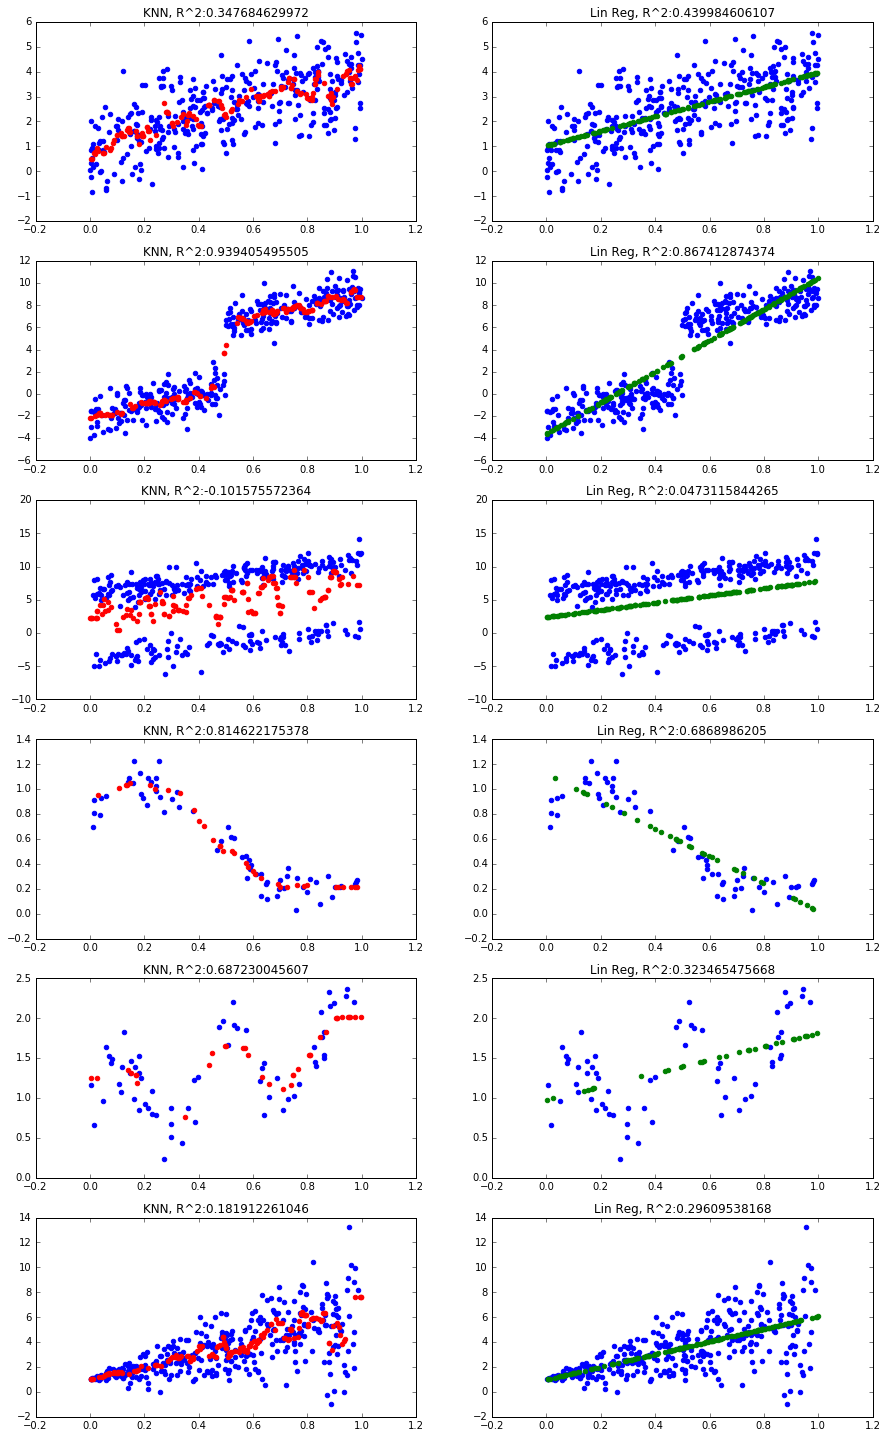

In [92]:
#number of neighbours
k=10

#plot predicted points
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12)) = plt.subplots(6, 2, figsize=(15, 25))

def plot_dataset(filename, ax1, ax2):
    missing_df = pd.read_csv('./dataset/'+str(filename)+'_missing.txt')
    full_df = pd.read_csv('./dataset/'+str(filename)+'_full.txt')

    no_y_ind = missing_df[missing_df['y'].isnull()].index
    with_y_ind = missing_df[missing_df['y'].notnull()].index

    predicted_knn, r_knn = fill_knn(missing_df, 
                                    full_df, 
                                    no_y_ind, 
                                    with_y_ind, 
                                    k)

    predicted_lin, r_lin = fill_lin_reg(missing_df, 
                                        full_df, 
                                        no_y_ind, 
                                        with_y_ind)

    ax1, ax2 = plot_missing(ax1, 
                            ax2, 
                            predicted_knn, r_knn,
                            predicted_lin, r_lin,
                            k,
                            no_y_ind, 
                            with_y_ind)

plot_dataset('dataset_1', ax1, ax2)
plot_dataset('dataset_2', ax3, ax4)
plot_dataset('dataset_3', ax5, ax6)
plot_dataset('dataset_4', ax7, ax8)
plot_dataset('dataset_5', ax9, ax10)
plot_dataset('dataset_6', ax11, ax12)

plt.show()

**Compare the result of filling in the missing values using KNN and linear regression, using both the R^2 coefficient as well as data visualization **

#### Data Set 1
Linear Regression has a higher R^2 than KNN as the trend in the data is approximately linear and overall this produces a better estimate than trying to mimic the local scatter which is what KNN tries to do. 

#### Data Set 2
Although the data does appear to have an overall linearly increasing trend, the data set has two distinct clusters so is not linear. The R^2 value shows that KNN is a better model than linear regression although the R^2 scores for the two models are much more similar than for Data set 1 (and also much larger indicating that the models are better approximations of the underlying data).

#### Data Set 3
This data set also appears to have an upward trend, although there are two distinct sets which are separated along the y axis indicating a one to many map i.e. similar x values appear to result in two different sets of y values which also have an upward trend. 

The KNN model has a negative R^2 value indicating that it is actually a worse predictor than just assigning every test point the mean Y value. The linear model also has a very low R^2 value of just 0.04 indicating that it is also a poor predictor. 

Neither predictor performs well on this data set. 

#### Data Set 4

This data set appears to have a decreasing trend but it is not linear and has more of a polynomial form. The KNN model can be seen to generate predictions that better fit the underlying characteristics of the data compared to the linear model which does not capture the peak and trough. The R^2 values also show that the KNN model is a better predictor than the linear model. 

#### Data Set 5

This data set appears to have two components - a sinusoidal component and a linearly increasing component. The KNN model is able to capture both of these features of the data and use them in the predictions, whereas the linear model disregards any of the sinusoidal component and hence has a much lower R^2 value in comparison.  

Data sets 5 and 6 also have much fewer test points in comparison to the other data sets.

#### Data Set 6

The final data set has a large amount of scatter in the y values with the amount of scatter increasing as the x value increases. The KNN model attempts to capture this scatter but overall the KNN model results in a smaller R^2 value compared to the linear fit. 

**What are the conditions under which KNN performs better than linear regression, under which linear regression performs better than KNN and under which both perform equally (well or poorly)?**

Overall when the data is assessed visually and the trend in the data is approximately linear, linear regression results in a better predictor (better R^2 value) as it assumes that the data can conform to a linear model. However when there is underlying non-linear structure in the data e.g. sinusoidal, clustering, the linear model cannot capture this behaviour and so KNN produces a better predictor as it have any prior beliefs about the data. 
Both predictors perform poorly on data that has overlapping regions e.g. regions where the same x value can result in multiple y values. 

The R^2 value can only indicate the fit of the model, it can't tell you why the model is good/bad, hence it is important to visualise the data as well as calculating R^2 values. 


Total number of training samples:  345


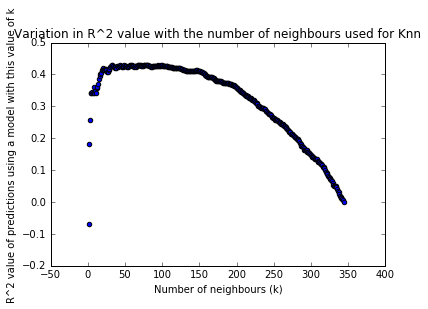

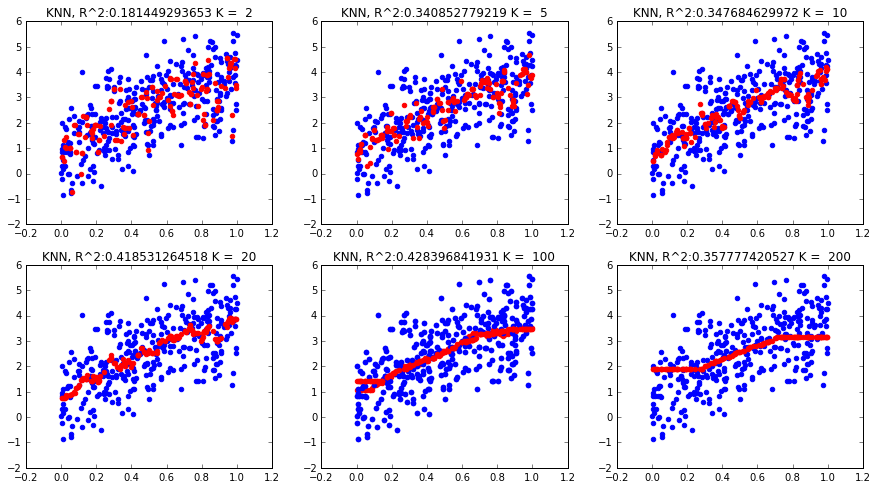

In [113]:
# investigating the choice of K on the predictions:
# plot the predictions for different values of K and the resulting R^2 values 
def plot_knn(missing_df, full_df, no_y_ind, with_y_ind, ax, k):
    predicted_knn, r_knn = fill_knn(missing_df, 
                                    full_df, 
                                    no_y_ind, 
                                    with_y_ind, 
                                    k)
    plot_knn_missing(ax, 
                 predicted_knn, 
                 r_knn,
                 k,
                 no_y_ind, 
                 with_y_ind)
    
def plot_knn_missing(ax, predicted_knn, r_knn, k, no_y_ind, with_y_ind):
    ax.scatter(predicted_knn.loc[with_y_ind]['x'].values, 
                predicted_knn.loc[with_y_ind]['y'].values, 
                color='blue')

    ax.scatter(predicted_knn.loc[no_y_ind]['x'].values, 
                predicted_knn.loc[no_y_ind]['y'].values, 
                color='red')

    ax.set_title('KNN, R^2:' + str(r_knn) + ' K =  '+str(k))
    
filename = 'dataset_1'
missing_df = pd.read_csv('./dataset/'+str(filename)+'_missing.txt')
full_df = pd.read_csv('./dataset/'+str(filename)+'_full.txt')
no_y_ind = missing_df[missing_df['y'].isnull()].index
with_y_ind = missing_df[missing_df['y'].notnull()].index

print 'Total number of training samples: ', len(with_y_ind)

K = range(1, 345)
r_nns = [fill_knn(missing_df, full_df, no_y_ind, with_y_ind, k)[1] for k in K]
plt.figure()
plt.scatter(K, r_nns)
plt.title('Variation in R^2 value with the number of neighbours used for Knn')
plt.xlabel('Number of neighbours (k)')
plt.ylabel('R^2 value of predictions using a model with this value of k')
plt.show()

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15,8))
plot_knn(missing_df, full_df, no_y_ind, with_y_ind, ax1, 2)
plot_knn(missing_df, full_df, no_y_ind, with_y_ind, ax2, 5)
plot_knn(missing_df, full_df, no_y_ind, with_y_ind, ax3, 10)
plot_knn(missing_df, full_df, no_y_ind, with_y_ind, ax4, 20)
plot_knn(missing_df, full_df, no_y_ind, with_y_ind, ax5, 50)
plot_knn(missing_df, full_df, no_y_ind, with_y_ind, ax5, 100)
plot_knn(missing_df, full_df, no_y_ind, with_y_ind, ax6, 200)

# total number of training data points (i.e. with_y_ind) is 345

**Using dataset_1_missing.txt, explain the impact of the choice of  k  on the performance of KNN.**

The first plot shows the variation in the R^2 value for values of k in the range 1-345 (where 345 is the number of training samples) and the next set of plots show the visualisation of the predictions for a selection of values of k in the range 2-345. For small values of k up to approximately 25, increasing k, has a large positive effect on the R^2 value - i.e. using more neighbours in the averaging calculation for the prediction results in a better prediction. However for values of k greater than 25, the the R^2 value plateaus and the R^2 value starts to decrease rapidly as the value of k approaches the total number of points in the training data set, as the predictor then approaches a predictor that just uses the global mean. 


---

## Problem 3: Is the Best (Linear Model) Good Enough?

In this problem, we will specifically look at conditions under which linear regression excels or fails.

The datasets required for this problem is in the ``dataset`` directory. Each file in the ``dataset`` directory contains a one-dimensional data set, with the first column containing the independent variable X, and the second column containing the dependent variable Y.

### Part (a): Introduction to Residual Plots

- Read ``dataset_1_full.txt``. Visualize the dataset and make some initial observations.


- For this data set, what can you say about the following linear fits: 

    1. slope = 0.4, intercept = 0.2
    2. slope = 0.4, intercept = 4
    3. linear regression model


- In each case, visualize the fit, compute the residuals, and make a residual plot of predicted values along with  residuals, as well as a residual histogram. What do these plots reveal?  


- Calculate the R^2 coefficient for all three fits. What do the erors reveal? How do they compare to the residual plots?

**Solution:**

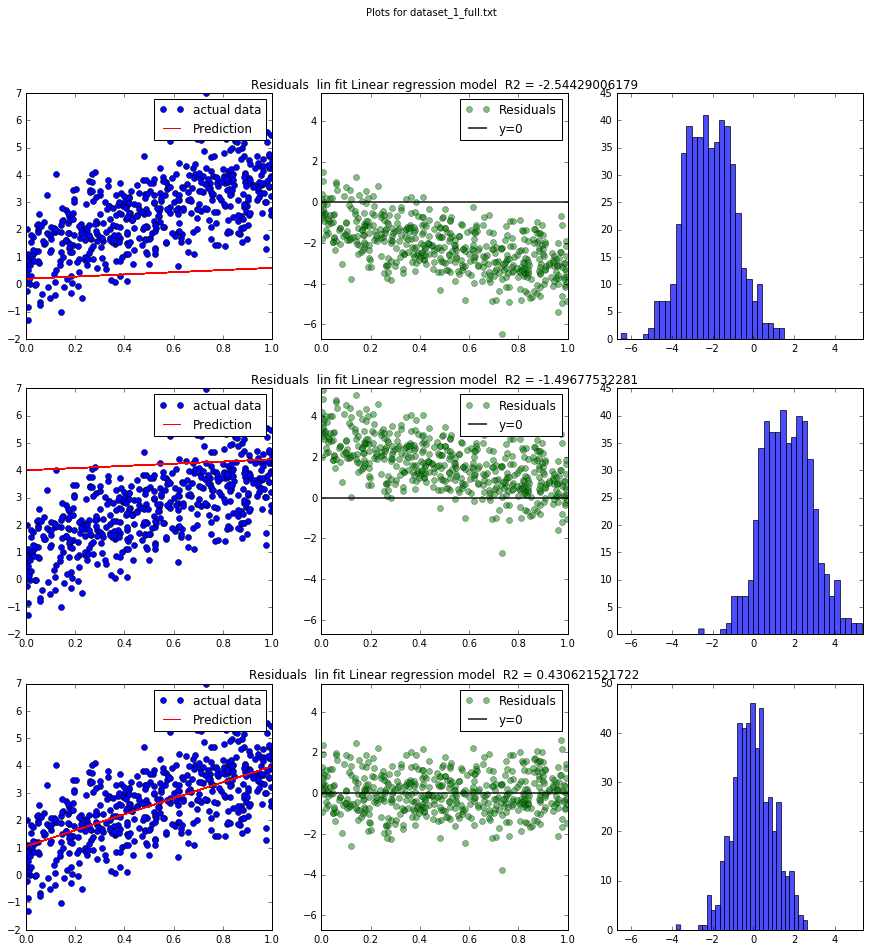

In [65]:
full_df = pd.read_csv('./dataset/dataset_1_full.txt')
def plot_lin_fit_and_residual(X, Y, Y_h, prediction_label, ax1, ax2, ax3, xmin, xmax):
    e = Y_h-Y
    R2 = calculate_R2(Y, Y_h)
    ax1.plot(X,Y, 'o', label=r'actual data')
    ax1.plot(X, Y_h, color='r', label="Prediction")
    ax1.legend()
    ax2.set_title("Residuals  "+str(prediction_label)+"  R2 = "+str(R2))
    ax2.plot(X,e, 'go', alpha=0.5, label='Residuals')
    ax2.axhline(y=0, color='black', linewidth=2.0, alpha=0.7, label='y=0')
    ax2.legend()
    ax2.set_ylim(xmin,xmax)
    ax3.hist(e, bins=30, alpha=0.7)
    ax3.set_xlim(xmin,xmax)
    
def calculate_R2(Y, Y_h):
    N = len(Y)
    RSS = np.sum((Y-Y_h)**2)
    RSE = np.sqrt(np.sum((Y-Y_h)**2))/(N-2)
    TSS = np.sum((Y-np.mean(Y))**2)
    R2 = 1 - RSS/TSS
    return R2

def plot_linear_fit(df, title):
    fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(15, 5))
    plt.suptitle('Plots for '+str(title))
    X = df['x'].reshape(len(df['x']), 1)
    Y = df['y']
    linear_model = Lin_Reg()
    linear_model.fit(X, Y)
    Y_h_3 = linear_model.predict(X)
    e3 = Y_h_3[0] - Y
    max_x = max(e3)
    min_x = min(e3)
    plot_lin_fit_and_residual(X,Y,Y_h_3, 'lin fit Linear regression model',  ax1, ax2, ax3,min_x, max_x)

def plot_fits_3models(df, title):
    fig, ((ax1, ax2, ax3),(ax4, ax5, ax6),(ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(15, 15))
    plt.suptitle('Plots for '+str(title))
    X = df['x'].reshape(len(df['x']), 1)
    Y = df['y']
    lims = set()
    Y_h_1 = 0.4*X + 0.2
    e1 = Y_h_1[0] - Y
    lims.update([min(e1), max(e1)])
    Y_h_2 = 0.4*X + 4
    e2 = Y_h_2[0] - Y
    lims.update([min(e2), max(e2)])
    linear_model = Lin_Reg()
    linear_model.fit(X, Y)
    Y_h_3 = linear_model.predict(X)
    e3 = Y_h_3[0] - Y
    lims.update([min(e3), max(e3)])
    max_x = max(lims)
    min_x = min(lims)
    plot_lin_fit_and_residual(X,Y,Y_h_1[:,0], 'lin fit Linear regression model',  ax1, ax2, ax3,min_x, max_x)
    plot_lin_fit_and_residual(X,Y,Y_h_2[:,0], 'lin fit Linear regression model',  ax4, ax5, ax6,min_x, max_x)
    plot_lin_fit_and_residual(X,Y,Y_h_3, 'lin fit Linear regression model',  ax7, ax8, ax9,min_x, max_x)
    
plot_fits_3models(full_df, 'dataset_1_full.txt')

#### Visualize the dataset and make some initial observations?
The data shows a linearly increasing trend, with a large range in the y values for each x value. 

#### What can you say about the following linear fits?
- a) **slope = 0.4, intercept = 0.2**
This line does not capture the linear trend of the data - the slope is too low so it significantly underpredicts the y values for the test points. This results in large negative residual errors, with the residual histogram showing a mode residual error of -2 in the y value. 
- b) **slope = 0.4, intercept = 4**
This line also has the same slope but larger intercept than the previous model. The slope does not capture the behaviour of the data and overpredicts the value of 'y' for small values of x, resulting in large positive residuals and the residual histogram shows a mode residual error of 2. 
- c) **linear regression model**
The plot of this linear model shows that it captures the increasing trend in the data. The residual plot shows that the residuals are only due to the scatter in the y values so are uniform around y = 0. The histogram of residuals also shows that the mode of the residuals is 0 so this model clearly outperforms the other two. 

#### Calculate the R^2 coefficient for all three fits. What do the errors reveal? How do they compare to the residual plots?
The R^2 value for models a) and b) is negative indicating that the model is a worse predictor that just assigning the global mean to each test point. The R^2 value for the linear regression model is quite high and positive, indicating that it is a much better fit to the data. 

### Part (b): What do Residual Plots Reveal?

- Read datasets ``dataset_2_full.txt`` through ``dataset_6_full.txt``. In each case, visualize the fit, compute the residuals, and make a residual plot of predicted values along with  residuals, as well as a residual histogram. What do these plots reveal about the fit of the model? 


- Calculate the R^2 coefficient each fit. What do the erors reveal? How do they compare to the residual plots?


- Based on your analysis, form conjectures regarding the precise relationship between the residual plots and the fit of the linear regression model. Conjecture on the precise conditions under which linear regression model is an appropriate model for a given dataset.

**Solution:**

[None, None, None, None, None]

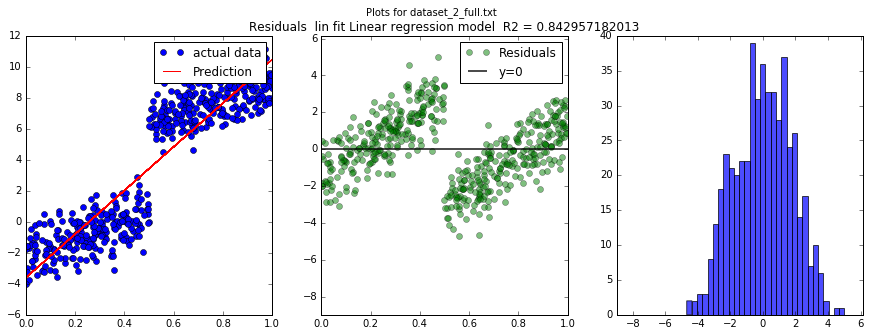

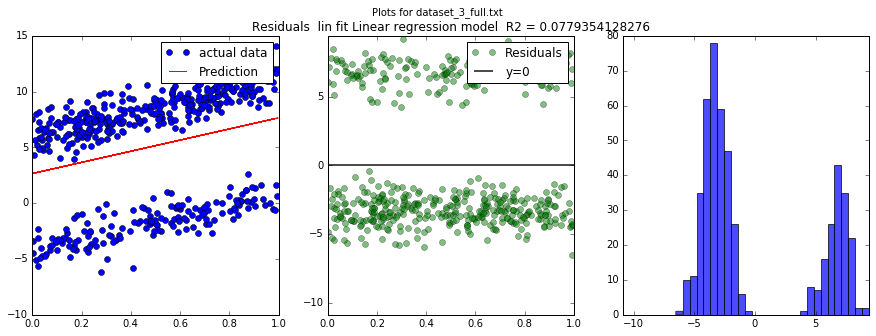

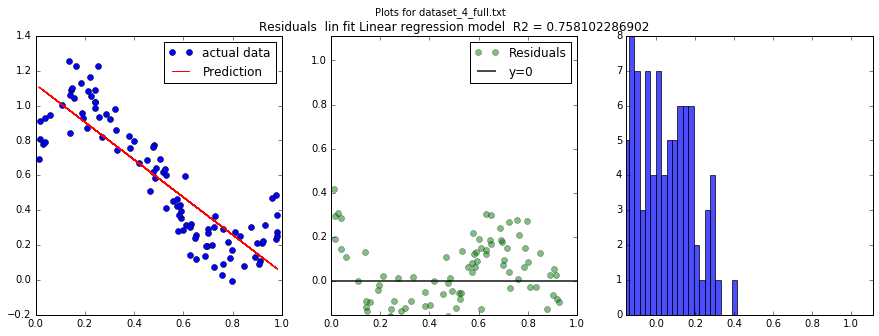

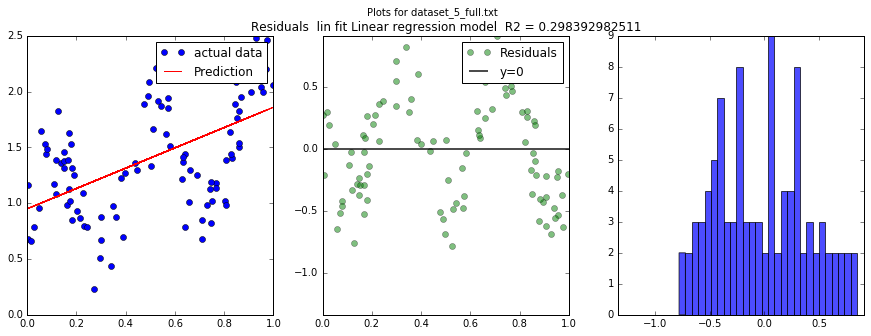

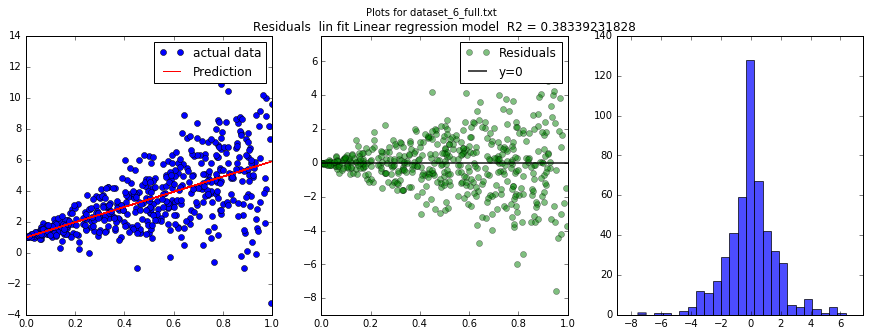

In [66]:
file_names = ['dataset_2_full.txt', 'dataset_3_full.txt','dataset_4_full.txt', 'dataset_5_full.txt', 'dataset_6_full.txt']
full_dfs = [pd.read_csv('./dataset/'+str(file_name)) for file_name in file_names]
[plot_linear_fit(df, file_names[i]) for i,df in enumerate(full_dfs)]

---

- **What do these plots reveal about the fit of the model?**

**Dataset 2**
With data that has clustering or non-linear structure, the linear model does not perform well. For data set 2, this is highlighted by the residual plot showing a specific pattern of two clusters similar to the clustering present in the raw data. 

**Dataset 3**
For this dataset, linear regression does not fit the data well as there is one to many map (the same x value results in multiple y values). Two seperate linear regression models on the two clusters may be prefereable. The lack of fit of the current model is also highlighted by the residual plot which shows two groups of data residuals above and below y =0.  The residual histogram is bimodal and supports the conclusion that the linear model is unsuitable for this dataset.

**Dataset 4 and 5**
For these datasets, linear regression does not fit the data well as there is a non-linear trend. A non-linear model may be prefereable (e.g. polynomial regression). For Dataset5, the reisudal plot shows the presence of a non-linear distribution which is the inverse of the non-linearity in the dataset. The residual histograms for these data sets are also not centred around an error of 0. 

**Dataset 6**
With this dataset, the spread in the y value increases as the x value increases, and there is also a general upward trend. This spreading behaviour is also visible in the residual plot. The residual histogram is also centred around 0 indicating that the mode error is 0.  

- **Calculate the R^2 coefficient each fit. What do the erors reveal? How do they compare to the residual plots?**

A higher R^2 value indicates a better fit of the linear model to the data. Out of the 6 datasets, the R^2 value is highest for data set 2 despite the data not being completely linear. The residual histogram is centred around 0 indicating that for the majority of test points, the residual error is 0. 

The second highest R^2 is for dataset 4 as the data points, although overall exhibiting more of a non-linear structure, lie close to the linear model predictor and hence the majority of the residual errors are close to 0. 

- **Based on your analysis, form conjectures regarding the precise relationship between the residual plots and the fit of the linear regression model. Conjecture on the precise conditions under which linear regression model is an appropriate model for a given dataset.**

Overall, when the data has some linear trend, the regression model can be used to formulate predictions with good R^2 values and low residual error, for example Data set 6.

When the residual histogram is centered around 0 and has a low spread, it indicates that the linear model is  good predictor as on average the residual error in the prediction is zero with no extreme under/over prediction. 

For data sets which have overlapping regions or one to many maps, linear regression is a bad choice of model as it is unable to model the clustering or overlapping behaviour and this can be seen by the very low R^2 value for data set 3. 

## Challenge Problem: Combining Random Variables

This problem, we explore the distirbution of random variables that result from combining other random variables.

### Part (a): Adding Two Uniformly Distributed Variables

Consider the independent random variables $X\sim U(0, 1)$ and $Y\sim U(0, 1)$. Let $Z$ be the random variable $Z = X + Y$. 

What is the distribution of $Z$ (give the pdf for Z)? You should fully explain and support your conlusion. 

**Hint:** your solution can be a combination of experimentation, empirical evidence and/or algebra

**Solution:**

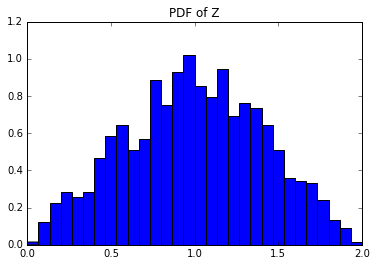

In [74]:
x_samples = np.random.uniform(0,1,1000)
y_samples = np.random.uniform(0,1,1000)
z_samples = x_samples + y_samples
# fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(15, 5))
plt.hist(z_samples, range=[0,2], bins=30, normed=True)
plt.title('PDF of Z')
plt.show()

For two independent random variables, the density of their sum, is the convultion of their densities. 

$$
f_z(z) = \int_{-\infty}^{+\infty}{f_x(z-y)f_y(y)dy}
$$

As  $f_y(y)=1$ only in the range [0,1]  this reduces to :

$$
f_z(z) = \int_0^1{f_x(z-y)dy}
$$

This is zero unless $0 \le z-y \le 1$. 

In the range $0 \le z \le 1$:

$$
f_z(z) = \int_0^z{dy} = z
$$

and in the range $1 \le z \le 2$

$$
f_z(z) = \int_{z-1}^1{dy} = 2-z
$$

and for $z \le 0$ or $z \ge 2$:

$$
f_z(z) = 0
$$

Therefore the pdf of Z is triangular and is confirmed by the plot of the PDF as shown above. 

##### Part (b): Adding Multiple Uniformly Distributed Variables

Consider three independent random variables $X_1, X_2, X_3 \sim U(0, 1)$. Let $Z$ be the random variable $Z = X_1 + X_2 + X_3$. 

What is the distribution of $Z$? What if you add 10 or 12 independent (standard) uniformly distributed variables? Conjecture on the distribution of 
$$
Z = \lim_{n\to \infty} \sum_{i=1}^n X_i
$$
where $\left\{X_i \right\}$ are independent (standard) uniformly distributed variables.

**Hint:** your solution can be a combination of experimentation, empirical evidence and/or algebra

**Solution:**

In [86]:
def plot_sum_uniform(n):
    xs = [np.random.uniform(0,1,1000) for i in range(n)]
    z = np.sum(xs, axis=0)
    plt.hist(z, bins=50, normed=True)
    plt.show()

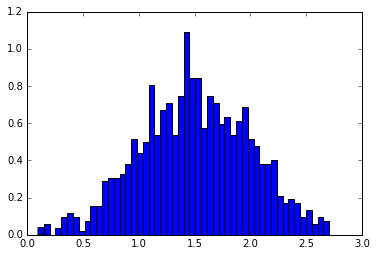

In [85]:
# sum of three uniform random variables 
plot_sum_uniform(3)

With three uniform random variables, the distribution appears to have three domains: 0-1, 1-2 and 2-3. The Irwin Hall distribution with n = 3 can be used to characterise the pdf of Z in the different domains:

In the range $0 \le z \lt 1$:

$$
f_z(z) = (1/2)z^2
$$

and in the range $1 \le z \lt 2$

$$
f_z(z) = (1/2)(-2z^2 + 6z -3)
$$

and for $2 \le z \lt 3$:

$$
f_z(z) = (1/2)(z^2 - 6z + 9)
$$


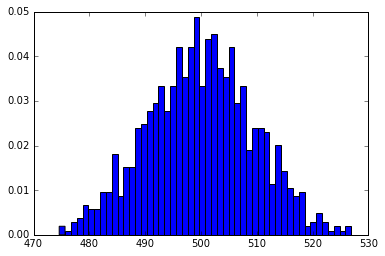

N = 1000


In [158]:
plot_sum_uniform(1000)
print 'N = 1000'

However with a sum of n=1000 variables, the pdf starts to resemble a normal distribution. 

Using the central limit theorem it can be shown that the distribution of n  independent identically distributed variables converges to a normal distribution regardless of the underlying distribution. In this case, the resulting normal has mean = $n\mu$ and variance = $n\sigma_2$ where $\mu$ and $\sigma_2$ are the mean and standard deviation of the uniform distribution. 


### Part (c): Combining Normally Distributed Variables

Consider the independent random variables $X\sim \mathcal{N}(0, 1)$ and $Y\sim \mathcal{N}(0, 1)$. Let $Z$ be the random variable $Z = X + Y$. 

What is the distribution of $Z$ (give the pdf for Z)? You should fully explain and support your conlusion. 

**Hint:** use properties of expected value and some experimentation.

**Solution:**

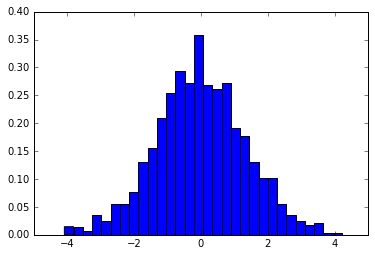

In [75]:
x_samples = np.random.normal(0,1,1000)
y_samples = np.random.normal(0,1,1000)
z_samples = x_samples + y_samples
# normed = True displays the pdf of the data 
plt.hist(z_samples, bins=30, normed=True)
plt.show()

The plot of the pdf of Z shows that it is also normally distributed with mean 0 and standard deviation of 8. It can be shown that the pdf of z is always normally distributed with $\mu_1 + \mu_2$ and standard deviation $\sigma_1^2 + \sigma_2^2$.

We will use the properties of moment generating functions (mgf) that the mgf of a sum of independent random variables is the product of the corresponding mgfs. 

The mgf of a random variable X is:

$$
M_x(t) = E[e^{tX}]
$$

Taking the mgf of a normal random variable as:   
$$
M_x(t) = e^{{\mu_1{t} + {{t^2{\sigma_1^2}} \over {2}}}}
$$

The mgf of Z will be:
$$
M_{X+Y}(t) = e^{{\mu_2{t} + {{t^2{\sigma_2^2}} \over {2}}}} e^{{\mu_2{t} + {{t^2{\sigma_2^2}} \over {2}}}}
$$

$$ 
M_{X+Y}(t) = e^{{({\mu_1 + \mu_2}){t} + {{t^2({{\sigma_1^2} + {\sigma_2^2}})} \over {2}}}}
$$

This results in a mfg of a normally distributed variable with standard deviation $\sigma_1^2 + \sigma_2^2$ and mean $\mu_1 + \mu_2$ 

### Part (d): Product of Normally Distributed Variables

Is the product of two normally distributed variables a normally distributed variable? You should fully explain and support your conlusion. 

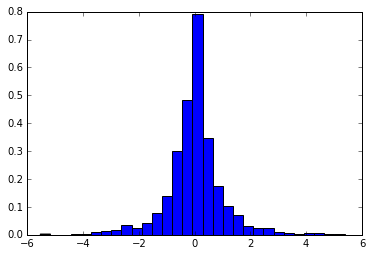

In [154]:
x_samples = np.random.normal(0,1,1000)
y_samples = np.random.normal(0,1,1000)
z_samples = x_samples*y_samples
plt.hist(z_samples, bins=30, normed=True)
plt.show()

**Solution:**

The pdf of Z does not look normaly distributed. If X and Y are normally distributed, then Z = X*Y is not normally distributed. 

This can be proven theoretically using the 'tower hill' theorem. This theorem states that if you have two random variables, an expectation can be taken over one variable while treating the other as a constant (i.e. condition on the other variable) and then the expectation can be taken over the other variable. 

In this example, let Z=XY for X and Y which are two independent normally distributed random variables. Using the tower law: 
$$
M_Z(t) = E[ \big(E[e^{tX}|Y] \big)^Y] = E[ \big( e^{{\mu_1{tY} + {{(tY)^2{\sigma_1^2}} \over {2}}}} \big)]
$$

If the resulting expression is evaluated it is not in the same format as the MGF for a normal distribution. It will only result in a normal distribution in trivial cases e.g. if the variance of one of the random variables is 0, which is the same as multiplying the other random variable by a constant. 

Therefore the product of two normally distributed random variables does not necessarily result in a normally distributed variable. 

---